In [13]:
import tensorflow as tf

from tensorflow import keras

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns


import os

# ''

In [14]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [15]:
x_valid, x_train = x_train[:5000] / 255.0, x_train[5000:] / 255.0 #We need to scale it
y_valid, y_train = y_train[:5000], y_train[5000:]

In [16]:
classes = [1, 2, 3, 4, 5, 6, 7, 8, 9]

unique_labels , counts = np.unique(y_train, return_counts=True)

print('Unique Labels: ', str(unique_labels))
print('Counts: ', counts)

unique_labels[y_train[5]]

# plt.bar(unique_labels, counts)
# plt.xlabel('Digits')
# plt.ylabel('Count')
# plt.title('MINIST Data')
# plt.show()


Unique Labels:  [0 1 2 3 4 5 6 7 8 9]
Counts:  [5444 6179 5470 5638 5307 4987 5417 5715 5389 5454]


8

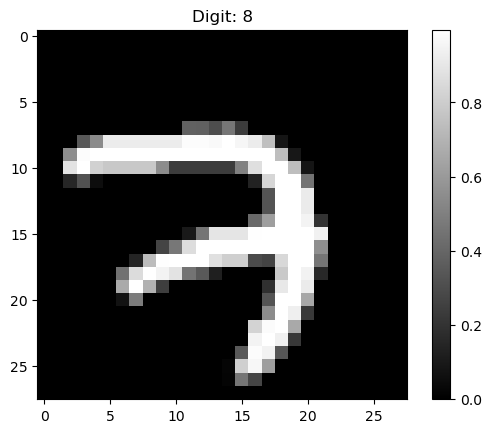

In [17]:
INDEX = 0

plt.imshow(x_train[0], cmap='gray')
plt.title(f'Digit: {y_train[5]}')
plt.colorbar()
plt.show()

In [18]:
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation='sigmoid', kernel_initializer='he_normal'),
])


c:\Users\Iredia Omoike\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
name = [(var.name, var.trainable) for var in model.layers[1].variables]
name

[('gamma', True),
 ('beta', True),
 ('moving_mean', False),
 ('moving_variance', False)]

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 784)            │         3,136 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,346 (1.04 MB)

 Trainable params: 268,978 (1.03 MB)

 Non-trainable params: 2,368 (9.25 KB)

In [21]:
optimizer = keras.optimizers.SGD(learning_rate=0.01, momentum=0.1, clipvalue=1.0)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer,metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))

Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.8305 - loss: 0.5555 - val_accuracy: 0.9388 - val_loss: 0.2061
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9355 - loss: 0.2149 - val_accuracy: 0.9536 - val_loss: 0.1634
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9547 - loss: 0.1491 - val_accuracy: 0.9580 - val_loss: 0.1365
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9641 - loss: 0.1176 - val_accuracy: 0.9620 - val_loss: 0.1234
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9689 - loss: 0.1028 - val_accuracy: 0.9646 - val_loss: 0.1198


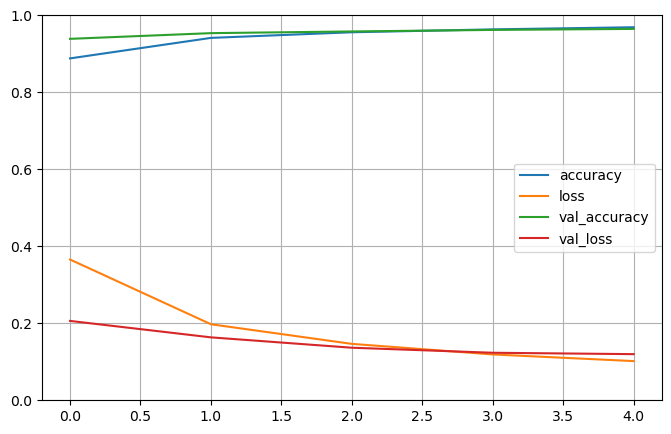

In [23]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [24]:
model.evaluate(x_test, y_test)
test_loss, test_acc = model.evaluate(x_test, y_test, )
print(test_acc, test_loss) #This model overfitted

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8202 - loss: 59.9883
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8202 - loss: 59.9883
0.8238000273704529 60.901954650878906


In [26]:
X_new = x_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step


array([[0., 0., 1., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0., 0., 0., 1., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 1., 0., 0.]], dtype=float32)